Processing Columns: 100%|██████████████████████| 95/95 [00:00<00:00, 343.55it/s]


Best predictor for Bankruptcy:  [' Net Income to Total Assets']


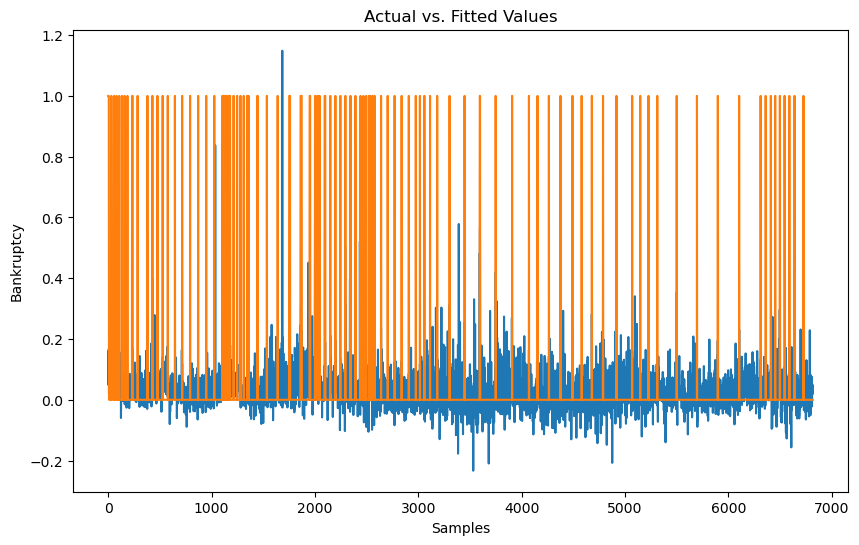

In [25]:
#To implement linear regression on the best predictor for company bankruptcy, I will be using the forward selection algorithm.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm import tqdm


companies = pd.read_csv('data.csv')

target = 'Bankrupt?'
predictors = [col for col in companies.columns if col != target]

#forward selection
def forward_selection (companies, target, predictors):
    features = []
    best_features = []
    while True: 
        features_left = list(set(predictors) - set(features))
        new_val = pd.Series(index = features_left)
        for new_col in tqdm(features_left, desc="Processing Columns"):
            model = sm.OLS(companies[target], sm.add_constant(companies[features + [new_col]])).fit()
            new_val[new_col] = model.pvalues[new_col]
        min_p_value = new_val.min()
        if min_p_value < 0.05:
            best_feature = new_val.idxmin()
            features.append(best_feature)
            best_features.append(best_feature)
        else:
            break
        return best_features

best_predictors = forward_selection(companies, target, predictors)
print("Best predictor for Bankruptcy: ", best_predictors)

final_model = sm.OLS(companies[target], sm.add_constant(companies[best_predictors])).fit()

#plot
plt.figure(figsize=(10, 6))
plt.plot(final_model.fittedvalues, label = "Fitted Values")
plt.plot(companies[target], label="Actual Values")
plt.legend
plt.xlabel('Samples')
plt.ylabel('Bankruptcy')
plt.title("Actual vs. Fitted Values")
plt.show()
